In [5]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for data preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


# required models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluation
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# for hyperparameter tuning
import optuna

import warnings
warnings.filterwarnings('ignore')

In [6]:
applicant_df = pd.read_csv('applicant.csv')
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [7]:
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [9]:
# joining both datasets using primary key (applicant_id)
df = pd.merge(applicant_df, loan_df, on='applicant_id')

In [10]:
# what data looks like
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [11]:
# whats the size of the data
df.shape

(1000, 27)

In [12]:
# what kinda datatypes data has
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [13]:
# number of null values in data
missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False),columns=['Null_Values'])
missing['null_%'] = missing['Null_Values']/df.shape[0]*100
missing

,Null_Values,null_%
Other_EMI_plans,814,81.4
Balance_in_existing_bank_account_(lower_limit_of_bucket),668,66.8
Telephone,596,59.6
Balance_in_existing_bank_account_(upper_limit_of_bucket),457,45.7
Has_been_employed_for_at_most,253,25.3
Savings_account_balance,183,18.3
Property,154,15.4
Has_been_employed_for_at_least,62,6.2
Purpose,12,1.2
Months_loan_taken_for,0,0.0


In [14]:
# number of duplicate rows in data
df.duplicated().sum()

0

### Observation:
* The data consist of 1000 rows and 27 numeric as well as categorical columns
* There is a mixture of categorical as well as numerical data

In [15]:
# making copy of dataframe
df1 = df.copy()

In [16]:
# dropping the redundant columns 
df1.drop(['loan_application_id','applicant_id'], axis=1, inplace=True)

In [17]:
# Ok we have to create for each group risky and non-risky loans.
df1['Age_Group'] = np.nan

lst = [df1]

for col in lst:
    col.loc[(col['Primary_applicant_age_in_years'] > 18) & (col['Primary_applicant_age_in_years'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Primary_applicant_age_in_years'] > 29) & (col['Primary_applicant_age_in_years'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Primary_applicant_age_in_years'] > 40) & (col['Primary_applicant_age_in_years'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Primary_applicant_age_in_years'] > 55, 'Age_Group'] = 'Elder'

In [18]:
# dropping columns with more than 40% null values
df1.drop(['Other_EMI_plans','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Telephone',
         'Balance_in_existing_bank_account_(upper_limit_of_bucket)'], axis=1, inplace=True)

In [19]:
# replacing Nan with mode
df1['Purpose'].fillna(df1['Purpose'].mode()[0], inplace=True)

In [20]:
# list of numeric columns
numeric_cols = ['Primary_applicant_age_in_years','Months_loan_taken_for','Principal_loan_amount']

# list of categorical columns
cat_cols=[]

for i in df1.columns:
    if i not in numeric_cols:
        cat_cols.append(i)
        
# list of ordinal columns
ordinal_cols = ['Number_of_dependents','Housing','Years_at_current_residence','Employment_status','Has_been_employed_for_at_least',
               'Has_been_employed_for_at_most','Savings_account_balance','EMI_rate_in_percentage_of_disposable_income',
               'Age_Group','Property']

#list of nominal columns
nominal_cols = ['Gender','Marital_status','Foreign_worker','Purpose','Has_coapplicant','Has_guarantor',
                  'Number_of_existing_loans_at_this_bank','Loan_history','high_risk_applicant']

In [21]:
for col in ordinal_cols:
    print(df1[col].value_counts())
    print('-------------------------\n')

1    845
2    155
Name: Number_of_dependents, dtype: int64
-------------------------

own         713
rent        179
for free    108
Name: Housing, dtype: int64
-------------------------

4    413
2    308
3    149
1    130
Name: Years_at_current_residence, dtype: int64
-------------------------

skilled employee / official                                         630
unskilled - resident                                                200
management / self-employed / highly qualified employee / officer    148
unemployed / unskilled - non-resident                                22
Name: Employment_status, dtype: int64
-------------------------

1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64
-------------------------

4 years    339
7 years    174
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64
-------------------------

Low          603
Medium       103
High          63
Very high     48
Name:

In [22]:
for col in nominal_cols:
    print(df1[col].value_counts())
    print('-------------------------\n')

male      690
female    310
Name: Gender, dtype: int64
-------------------------

single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
Name: Marital_status, dtype: int64
-------------------------

1    963
0     37
Name: Foreign_worker, dtype: int64
-------------------------

electronic equipment    292
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64
-------------------------

0    959
1     41
Name: Has_coapplicant, dtype: int64
-------------------------

0    948
1     52
Name: Has_guarantor, dtype: int64
-------------------------

1    633
2    333
3     28
4      6
Name: Number_of_existing_loans_at_this_bank, dtype: int64
-------------------------

existing loans paid back duly till now     530
criti

In [23]:
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = oe.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal).astype('int')
    return data

#create a for loop to iterate through each column in the data
ordinal_cols = ['Housing','Employment_status','Has_been_employed_for_at_least',
               'Has_been_employed_for_at_most','Savings_account_balance','Age_Group','Property']

categories = [['own','rent','for free'],['unemployed / unskilled - non-resident','unskilled - resident','skilled employee / official','management / self-employed / highly qualified employee / officer'],
             ['0 year','1 year','4 years','7 years'],['0 year','1 year','4 years','7 years'],
             ['Low','Medium','High','Very high'],['Young','Young Adults','Senior','Elder'],['car or other','real estate','building society savings agreement/life insurance']]

for col, i in list(zip(ordinal_cols, categories)):
    if df1[col].dtypes=='O':
        oe = OrdinalEncoder(categories=[i])
        encode(df1[col])

In [24]:
df1 = pd.get_dummies(df1, columns=['Gender','Marital_status','Purpose','Loan_history'], drop_first=True)
df1.head()

,Primary_applicant_age_in_years,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,Age_Group,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Purpose_business,Purpose_career development,Purpose_domestic appliances,Purpose_education,Purpose_electronic equipment,Purpose_new vehicle,Purpose_repair costs,Purpose_used vehicle,Loan_history_critical/pending loans at other banks,Loan_history_delay in paying off loans in the past,Loan_history_existing loans paid back duly till now,Loan_history_no loans taken/all loans paid back duly
0,67,1,0,4,2,3,NaN,1,NaN,6,1169000,4,1,0,0,2,0,3,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,22,1,0,2,2,1,2,1,0,48,5951000,2,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,49,2,0,3,1,2,3,1,0,12,2096000,2,1,0,0,1,0,2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,45,2,2,4,2,2,3,1,0,42,7882000,2,2,0,1,1,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,53,2,2,4,2,1,2,1,0,24,4870000,3,NaN,0,0,2,1,2,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [25]:
imputer = KNNImputer()

df1 = pd.DataFrame(np.round(imputer.fit_transform(df1)),columns = df1.columns)

In [26]:
for col in df1.columns:
    if df1[col].max() > 2:
        df1[col] = df1[col]/df1[col].max()

In [27]:
x = df1.drop('high_risk_applicant', axis=1)
y = df1['high_risk_applicant']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0, stratify=y)

**Decision Tree Classifier**

In [29]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
cross_val_score(dt_model, x_train, y_train, n_jobs=-1,scoring='recall').mean()

0.3904761904761905

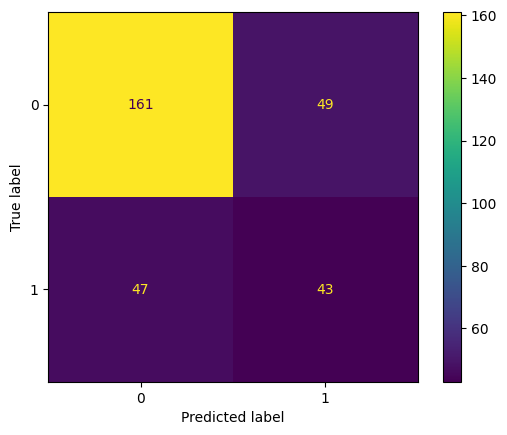

Recall - 0.4777777777777778
Accuracy- 0.68


In [31]:
dt_pred = dt_model.predict(x_test)

cm = confusion_matrix(y_test,dt_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
print('Recall -',recall_score(y_test,dt_pred))
print('Accuracy-', accuracy_score(y_test,dt_pred))

In [32]:
def objective_dt(trial):
        max_depth = trial.suggest_categorical('max_depth', [2,3,4,5,6,7,8])
        max_features = trial.suggest_categorical('max_features', [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])
        
        dt = DecisionTreeClassifier(
            criterion = 'entropy',
            splitter = 'best',
            max_depth = max_depth,
            max_features = max_features,
            class_weight = 'balanced',
            random_state=0
        )
        return cross_val_score(dt, x_train, y_train, n_jobs=-1, verbose=0, scoring='recall').mean()

In [33]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_dt, n_trials=150)

trial = study.best_trial

print('Recall : {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-12-26 21:31:57,293] A new study created in memory with name: no-name-c3ba29b2-baee-4d1b-a07e-4cdcc8aca41a
[I 2022-12-26 21:31:58,234] Trial 0 finished with value: 0.5666666666666667 and parameters: {'max_depth': 6, 'max_features': 0.5}. Best is trial 0 with value: 0.5666666666666667.
[I 2022-12-26 21:31:59,177] Trial 1 finished with value: 0.5523809523809524 and parameters: {'max_depth': 7, 'max_features': 0.8}. Best is trial 0 with value: 0.5666666666666667.
[I 2022-12-26 21:31:59,899] Trial 2 finished with value: 0.519047619047619 and parameters: {'max_depth': 8, 'max_features': 0.85}. Best is trial 0 with value: 0.5666666666666667.
[I 2022-12-26 21:31:59,927] Trial 3 finished with value: 0.5904761904761905 and parameters: {'max_depth': 8, 'max_features': 0.65}. Best is trial 3 with value: 0.5904761904761905.
[I 2022-12-26 21:31:59,944] Trial 4 finished with value: 0.5380952380952381 and parameters: {'max_depth': 8, 'max_features': 0.5}. Best is trial 3 with value: 0.59047619

Recall : 0.8571428571428571
Best hyperparameters: {'max_depth': 2, 'max_features': 0.55}


In [34]:
tuned_dt_model = DecisionTreeClassifier(
            criterion = 'entropy',
            splitter = 'best',
            max_depth = 2,
            max_features = 0.6,
            class_weight = 'balanced',
            random_state=0
        )
tuned_dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, max_features=0.6, random_state=0)

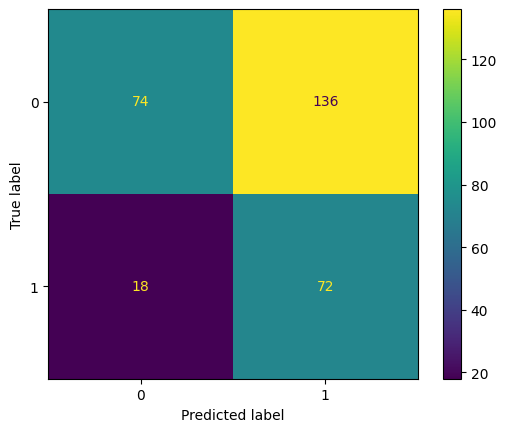

Recall - 0.8
Accuracy- 0.4866666666666667


In [35]:
tuned_dt_pred = tuned_dt_model.predict(x_test)

cm = confusion_matrix(y_test,tuned_dt_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
print('Recall -',recall_score(y_test,tuned_dt_pred))
print('Accuracy-', accuracy_score(y_test,tuned_dt_pred))

**Random Forest**

In [36]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [37]:
cross_val_score(rf_model, x_train, y_train, n_jobs=-1,scoring='recall').mean()

0.22380952380952382

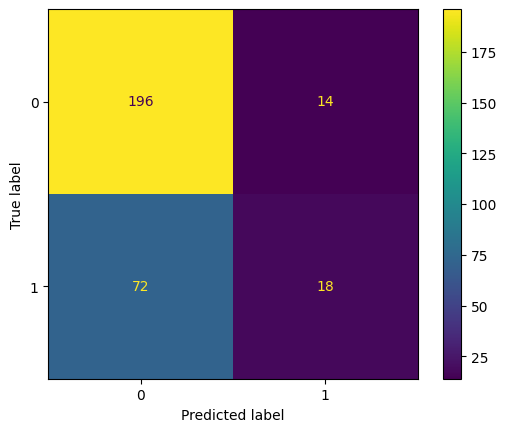

Recall - 0.2
Accuracy- 0.7133333333333334


In [38]:
rf_pred = rf_model.predict(x_test)

cm = confusion_matrix(y_test,rf_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
print('Recall -',recall_score(y_test,rf_pred))
print('Accuracy-', accuracy_score(y_test,rf_pred))

In [39]:
def objective_rf(trial):
        n_estimators = trial.suggest_categorical('n_estimators', [50,100,150])
        criterion = trial.suggest_categorical('criterion', ['gini','entropy'])
        max_depth = trial.suggest_categorical('max_depth', [2,4,5,6,7,8])
        max_features = trial.suggest_categorical('max_features', [0.3,0.4,0.5,0.6,0.7,0.9,0.8])
        class_weight = trial.suggest_categorical('class_weight', ['balanced','balanced_subsample'])
        max_samples =  trial.suggest_categorical('max_samples', [0.3,0.4,0.5,0.6,0.7,0.9,0.8])
        
        rf = RandomForestClassifier(
            n_estimators = n_estimators,
            criterion = criterion,
            max_depth = max_depth,
            max_features = max_features,
            bootstrap = True,
            random_state=0,
            class_weight = class_weight,
            max_samples = max_samples
        )
        return cross_val_score(rf, x_train, y_train, n_jobs=-1, verbose=0, scoring='f1').mean()

In [40]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_rf, n_trials=250)

trial = study.best_trial

print('Recall : {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-12-26 21:32:24,924] A new study created in memory with name: no-name-ecae8ade-f063-4b19-b1bd-1dff09db45c6
[I 2022-12-26 21:32:25,041] Trial 0 finished with value: 0.4784950343773874 and parameters: {'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 0.3, 'class_weight': 'balanced_subsample', 'max_samples': 0.5}. Best is trial 0 with value: 0.4784950343773874.
[I 2022-12-26 21:32:25,320] Trial 1 finished with value: 0.37210749886713756 and parameters: {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 0.9, 'class_weight': 'balanced', 'max_samples': 0.3}. Best is trial 0 with value: 0.4784950343773874.
[I 2022-12-26 21:32:25,503] Trial 2 finished with value: 0.5305629043470417 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.9, 'class_weight': 'balanced', 'max_samples': 0.6}. Best is trial 2 with value: 0.5305629043470417.
[I 2022-12-26 21:32:25,779] Trial 3 finished with value: 0.4175

Recall : 0.5726395652134137
Best hyperparameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 4, 'max_features': 0.7, 'class_weight': 'balanced_subsample', 'max_samples': 0.9}


In [41]:
tuned_rf_model = RandomForestClassifier(
            n_estimators = 50,
            criterion = 'entropy',
            max_depth = 4,
            max_features = 0.7,
            bootstrap = True,
            random_state=0,
            class_weight = 'balanced_subsample',
            max_samples = 0.8
        )
tuned_rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features=0.7, max_samples=0.8,
                       n_estimators=50, random_state=0)

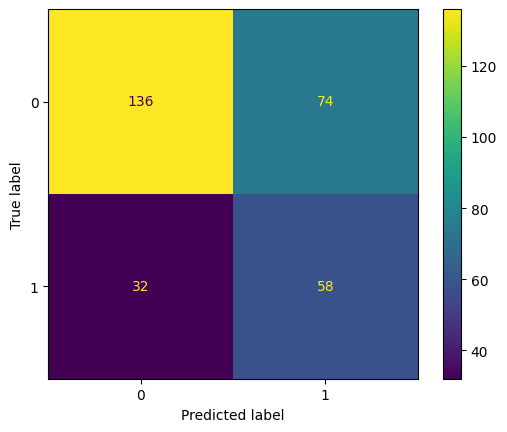

Recall - 0.6444444444444445
Accuracy- 0.6466666666666666


In [42]:
tuned_rf_pred = tuned_rf_model.predict(x_test)

cm = confusion_matrix(y_test,tuned_rf_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
print('Recall -',recall_score(y_test,tuned_rf_pred))
print('Accuracy-', accuracy_score(y_test,tuned_rf_pred))

Accuracy can be improved by resampling 
The data set has cons